In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib


In [2]:
df = pd.read_csv(r"C:\fili\jupyter_proyectos\cliente_tienda.csv")

df.head()

,CustomerID,Genero,Edad,Ingresos Anuales ($),Porcentajde de gastos (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()
df.describe()
# Por si quieres ver algunas columnas clave
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   CustomerID                     200 non-null    int64 
 1   Genero                         200 non-null    object
 2   Edad                           200 non-null    int64 
 3   Ingresos Anuales ($)           200 non-null    int64 
 4   Porcentajde de gastos (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Genero,Edad,Ingresos Anuales ($),Porcentajde de gastos (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Nos quedamos solo con columnas numéricas para el clustering
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Columnas numéricas usadas para clustering:")
print(numeric_cols)

X = df[numeric_cols].copy()

# Escalado estándar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]


Columnas numéricas usadas para clustering:
Index(['CustomerID', 'Edad', 'Ingresos Anuales ($)',
       'Porcentajde de gastos (1-100)'],
      dtype='object')


array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.56336851, -1.66266033, -0.39597992]])

In [5]:
inertias = []
silhouettes = []
K_range = range(2, 11)  # probamos de 2 a 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(X_scaled)
    
    inertia = kmeans.inertia_
    inertias.append(inertia)
    
    sil = silhouette_score(X_scaled, labels)
    silhouettes.append(sil)
    
    print(f"k={k}: inertia={inertia:.2f}, silhouette={sil:.4f}")


k=2: inertia=515.67, silhouette=0.3185
k=3: inertia=375.38, silhouette=0.3371
k=4: inertia=259.69, silhouette=0.4140
k=5: inertia=209.58, silhouette=0.4272
k=6: inertia=160.98, silhouette=0.4390
k=7: inertia=149.14, silhouette=0.4276
k=8: inertia=136.81, silhouette=0.3796
k=9: inertia=123.17, silhouette=0.3599
k=10: inertia=110.69, silhouette=0.3680


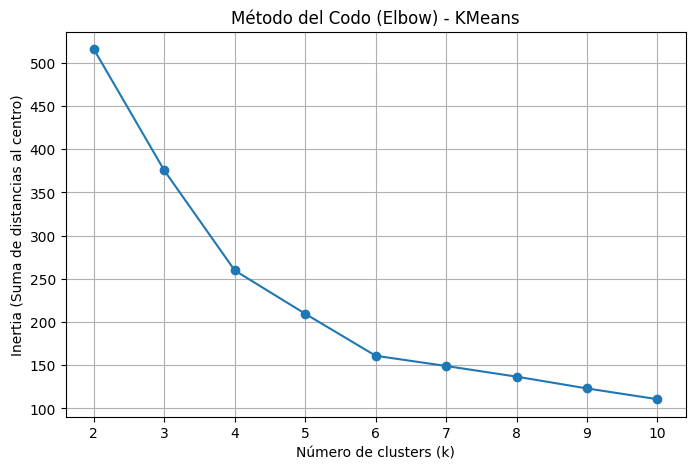

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(list(K_range), inertias, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inertia (Suma de distancias al centro)")
plt.title("Método del Codo (Elbow) - KMeans")
plt.grid(True)
plt.show()


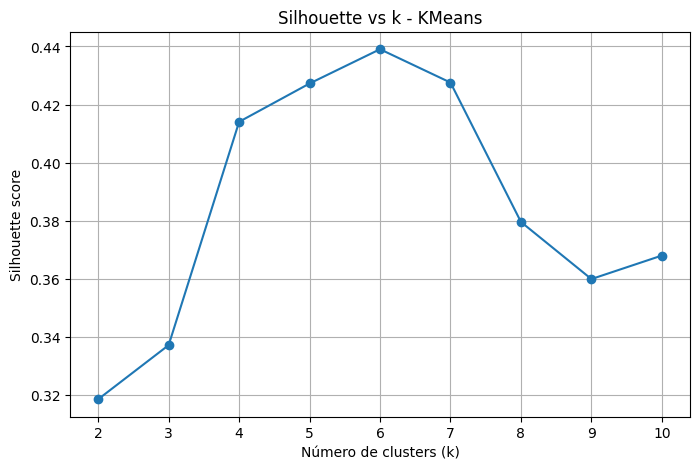

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(list(K_range), silhouettes, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette vs k - KMeans")
plt.grid(True)
plt.show()


In [8]:
# Elegir K automáticamente según mejor silhouette
best_k = K_range[int(np.argmax(silhouettes))]
print("Mejor k según silhouette:", best_k)

# Si quieres fijarlo manualmente, comenta la línea de arriba y usa algo como:
# best_k = 4

kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Añadir los clusters al DataFrame original
df['cluster'] = cluster_labels

df.head()


Mejor k según silhouette: 6


,CustomerID,Genero,Edad,Ingresos Anuales ($),Porcentajde de gastos (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [9]:
df['cluster'].value_counts().sort_index()


cluster
0    44
1    39
2    24
3    35
4    21
5    37
Name: count, dtype: int64

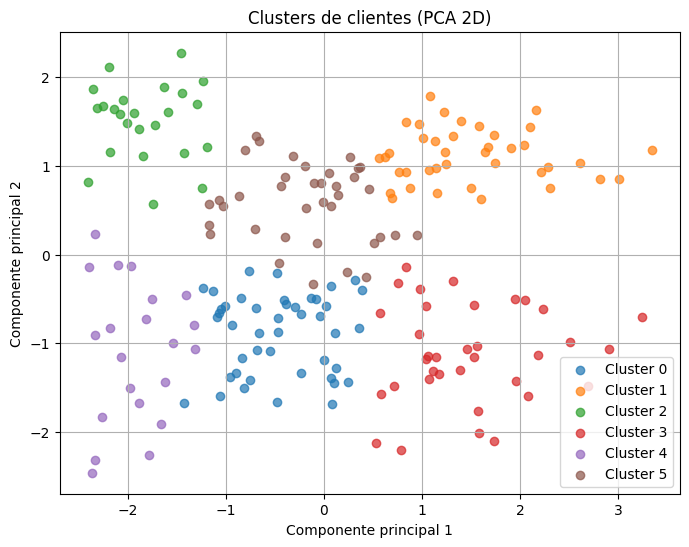

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for cluster_id in np.unique(cluster_labels):
    plt.scatter(
        X_pca[cluster_labels == cluster_id, 0],
        X_pca[cluster_labels == cluster_id, 1],
        label=f"Cluster {cluster_id}",
        alpha=0.7
    )

plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("Clusters de clientes (PCA 2D)")
plt.legend()
plt.grid(True)
plt.show()


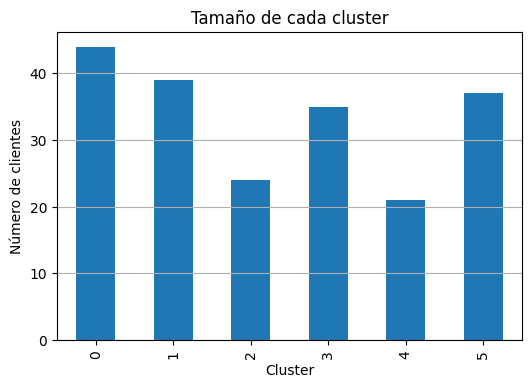

In [11]:
cluster_counts = df['cluster'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
cluster_counts.plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Número de clientes")
plt.title("Tamaño de cada cluster")
plt.grid(axis="y")
plt.show()


In [12]:
# Guardar el modelo KMeans y el scaler juntos en un dict
modelo_cluster = {
    "scaler": scaler,
    "kmeans": kmeans_final,
    "numeric_cols": list(numeric_cols)
}

joblib.dump(modelo_cluster, "modelo_kmeans_cliente_tienda.pkl")

print("Modelo de clustering guardado como 'modelo_kmeans_cliente_tienda.pkl'")


Modelo de clustering guardado como 'modelo_kmeans_cliente_tienda.pkl'
